#**Rodriguez Arnold David Fernando**
**Segunda evaluación - Física computacional**

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \xi \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\xi$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\xi = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\xi$, determinará el tipo de movimiento del oscilador:

* Movimiento sobreamortiguado ($\xi >; 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.

* Críticamente amortiguado ($\xi = 1$).

* Movimiento subamortiguado ($\xi <; 1$). Movimiento periódico que decae exponencialmente.

* Movimiento sin amortiguamiento ($\xi = 0$). Movimiento periódico regular.


#**Actividad 1**
Resuelver numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\xi \neq 0, F_0=0$).

Suponer que: $m=1, k=9, x(0) < 0, x'(0) = 0$.

Reproduzcir una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

In [11]:
#importamos las liberias 
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import math

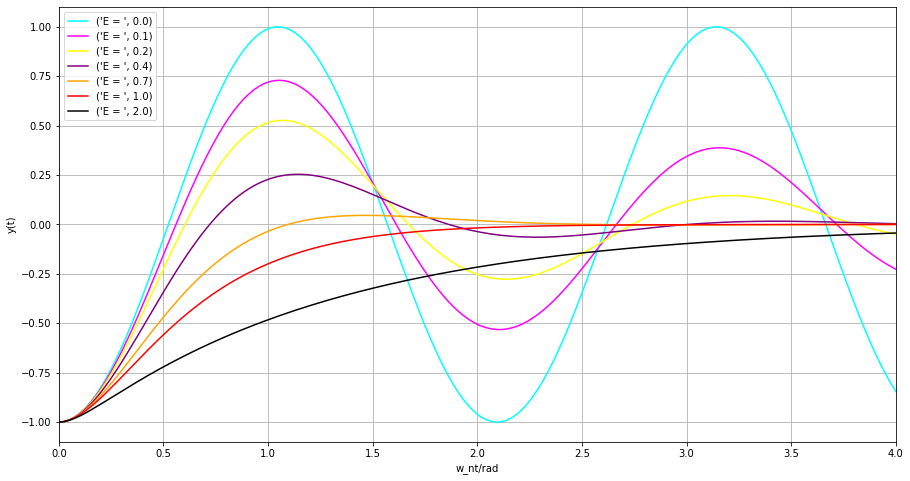

In [31]:
#Definimos las constantes de la masa y la constante del resorte para definir la frecuencia ddel oscilador 
k = 9
m = 1
wn = np.sqrt(k/m)
F = 0

# Definimos la funcion (hay que tomar en cuenta que xi es E)
def prob1(y, t, E, wn):
    x, v = y
    z = -2*E*wn*v-(wn**2)*x
    return [v,z]

# definimos el tiempo de integracion y las condiciones iniciles
t_0 = 0.0
y_0 = [-1.0, 0.0]

t_0 = 0
t_max = np.pi*4
Npts = 500
t = np.linspace(t_0,t_max,Npts)


# Definimos los casos para los coeficientes de amortiguamiento
E= [0.0,0.1,0.2,0.4,0.7,1.0,2.0]
c=["cyan","magenta","yellow","purple","orange","red","black"]

# Proponemos un conjuno de soluciones utilizando la funcion odeint
plt.figure(figsize=(15,8))
plt.xlim(0,4)
for m in range (7):
  sol = odeint(prob1, y_0, t, args=(E[m],wn,))
  Em=E[m]
  plt.plot(t, sol[:,0], label=("E = ",Em),color=c[m])
plt.legend(loc="upper left")
plt.title("")
plt.xlabel("w_nt/rad")
plt.ylabel("y(t)")
plt.grid()
plt.show()

#**Actividad 2**
Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\xi = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

In [74]:
#importamos las liberias 
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import math


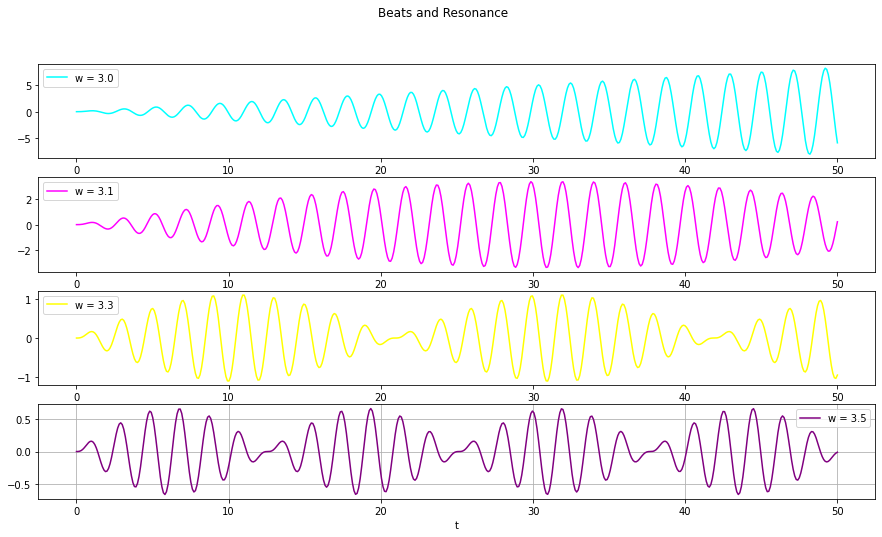

In [33]:
#Definimos las constantes
F = 1
m = 1
k = 9
wn= np.sqrt(k/m) 
E = 0

# Definimos la funcion (hay que tomar en cuenta que xi es E)
def prob2(y, t, wn, wf,F):
    x, v = y
    z = -wn**2*x + F*(1/m)*np.sin(wf*t)
    return [v,z]

# Definimos el tiempo de integracion y las condiciones iniciales
t_0 = 0.0
y_0 = [0.0, 0.0]

t_0 = 0
t_max = 50
Npts = 500
t = np.linspace(t_0,t_max,Npts)

# Definimos las recuencias de forzamiento para el seno
wf_1 = 3.0
wf_2 = 3.1
wf_3 = 3.3
wf_4 = 3.5

# Proponemos un conjunto de soluciones para wf y utilizar la funcion odeint
sol_0= odeint(prob2, y_0, t, args=(wn,wf_1,F,))
sol_1 = odeint(prob2, y_0, t, args=(wn,wf_2,F,))
sol_2 = odeint(prob2, y_0, t, args=(wn,wf_3,F,))
sol_3 = odeint(prob2, y_0, t, args=(wn,wf_4,F,))

# Hacemos las graficas correspondientes
fig, axs = plt.subplots(4,figsize=(15,8))
#plt.xlim(0,4)
axs[0].plot(t, sol_0[:,0], label="w = 3.0",color="cyan")
axs[1].plot(t, sol_1[:,0], label="w = 3.1",color="magenta")
axs[2].plot(t, sol_2[:,0], label="w = 3.3",color="yellow")
axs[3].plot(t, sol_3[:,0], label="w = 3.5",color="purple")

axs[0].legend(loc="upper left");
axs[1].legend(loc="best");
axs[2].legend(loc="best");
axs[3].legend(loc="best");
fig.suptitle("Beats and Resonance")
plt.xlabel("t")
plt.ylabel("")
plt.grid()
plt.show()

#**Actividad 3** 

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\xi \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\xi =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, 
que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

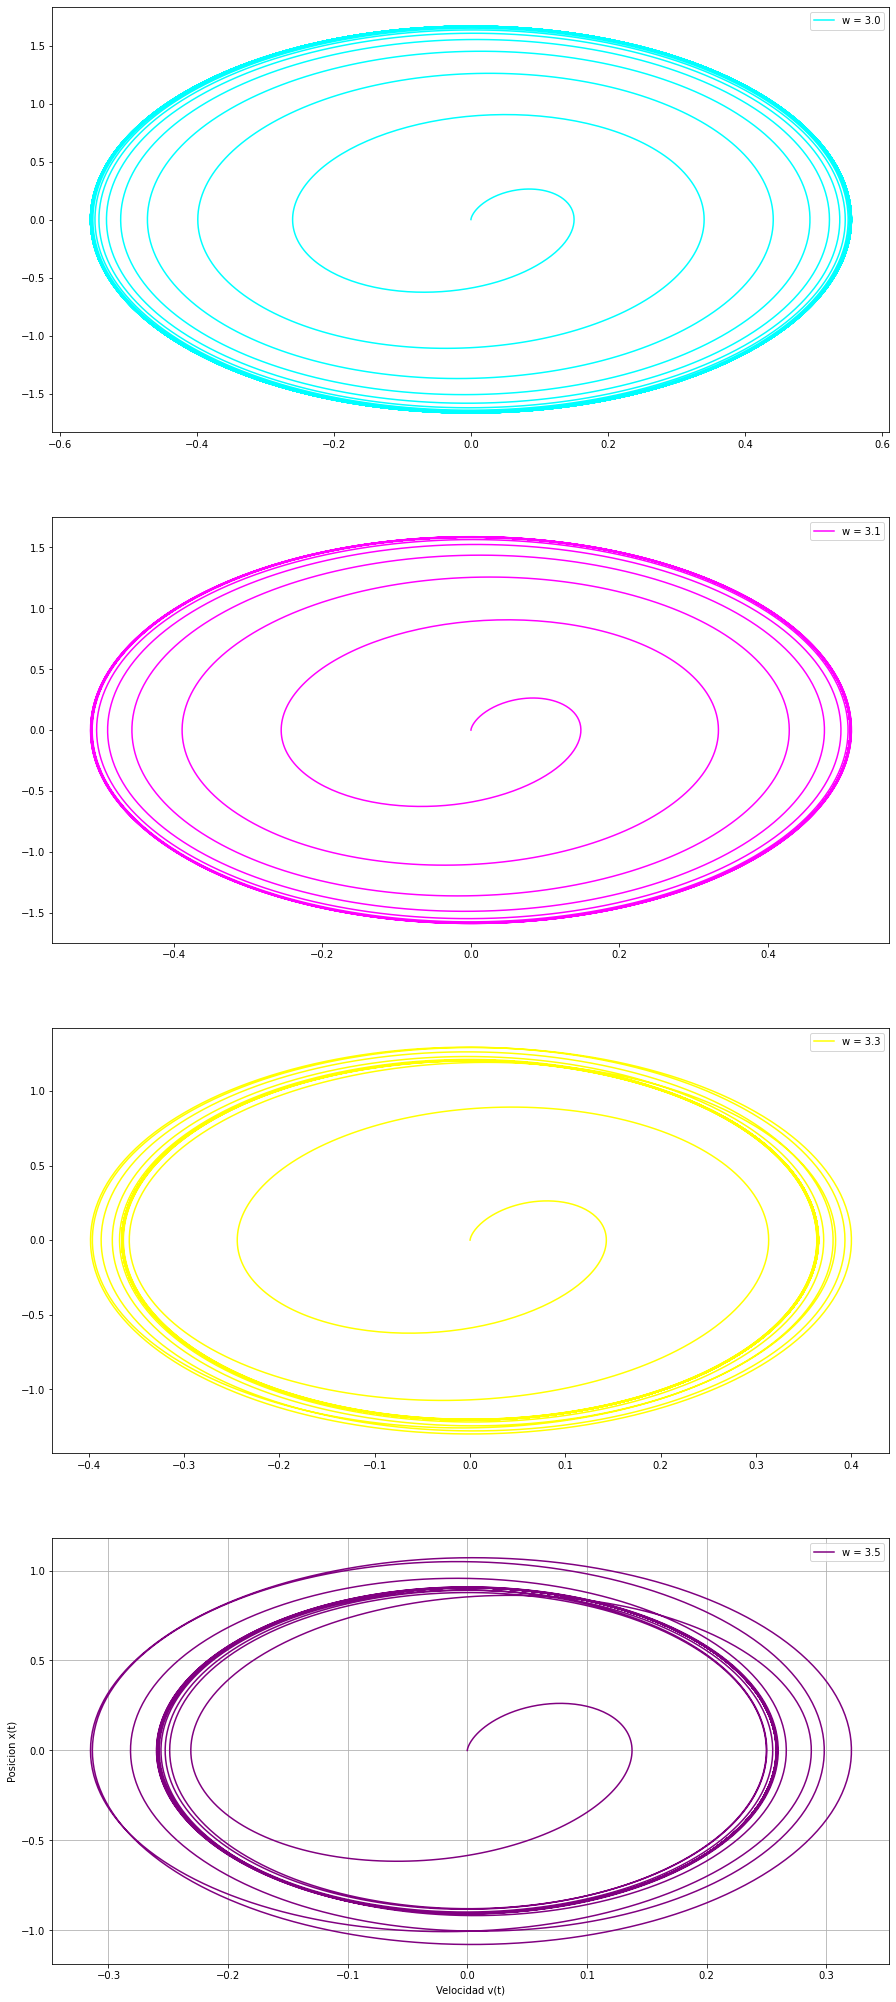

In [29]:
#Definimos las constantes
F = 1
m = 1
k = 9
wn= np.sqrt(k/m) 
E = 0.1

# Definimos la funcion (hay que tomar en cuenta que xi es E)
def prob2(y, t, E, wn, wf,F):
    x, v = y
    z = -2*E*wn*v -wn**2*x + F*(1/m)*np.sin(wf*t)
    return [v,z]

# Definimos el tiempo de integracion y las condiciones iniciales
t_0 = 0.0
y_0 = [0.0, 0.0]

t_0 = 0
t_max = 50
Npts = 5000
t = np.linspace(t_0,t_max,Npts)

# Definimos las recuencias de forzamiento para el seno
wf_1 = 3.0
wf_2 = 3.1
wf_3 = 3.3
wf_4 = 3.5

# Proponemos un conjunto de soluciones para wf y utilizar la funcion odeint
sol_0= odeint(prob2, y_0, t, args=(E,wn,wf_1,F,))
sol_1 = odeint(prob2, y_0, t, args=(E,wn,wf_2,F,))
sol_2 = odeint(prob2, y_0, t, args=(E,wn,wf_3,F,))
sol_3 = odeint(prob2, y_0, t, args=(E,wn,wf_4,F,))

# Hacemos las graficas correspondientes
fig, axs = plt.subplots(4,figsize=(15,36))
#plt.xlim(0,4)
axs[0].plot(sol_0[:,0], sol_0[:,1], label="w = 3.0",color="cyan")
axs[1].plot(sol_1[:,0], sol_1[:,1], label="w = 3.1",color="magenta")
axs[2].plot(sol_2[:,0], sol_2[:,1], label="w = 3.3",color="yellow")
axs[3].plot(sol_3[:,0], sol_3[:,1], label="w = 3.5",color="purple")

axs[0].legend(loc="best");
axs[1].legend(loc="best");
axs[2].legend(loc="best");
axs[3].legend(loc="best");
fig.suptitle("")
plt.xlabel("Velocidad v(t)")
plt.ylabel("Posicion x(t)")
plt.grid()
plt.show()